In [43]:
import numpy as np
import matplotlib.pyplot as plt
import random
import os

In [44]:
#define the vertical filter
img_filter = [[-1,-2,-1], [0,0,0], [1,2,1]]

#define the horizontal filter
horizontal_filter = [[-1,0,1], [-2,0,2], [-1,0,1]]

In [45]:
np.transpose(vertical_filter)

array([[-1,  0,  1],
       [-2,  0,  2],
       [-1,  0,  1]])

In [46]:
os.chdir('C:\\Users\\2ativ\\Documents\\Photos\\Photos\\')

In [47]:
all_images = os.listdir()
num = all_images[random.randint(0, len(all_images))]

In [48]:
img = plt.imread(num)

In [50]:
#get the dimensions of the image
n,m,d = img.shape

In [51]:
#initialize the edges image
edges_img = img.copy()

In [52]:
#loop over all pixels in the image
for row in range(3, n-2):
    for col in range(3, m-2):
        
        #create little local 3x3 box
        local_pixels = img[row-1:row+2, col-1:col+2, 0]
        
        #apply the vertical filter
        vertical_transformed_pixels =img_filter*local_pixels
        #remap the vertical score
        vertical_score = vertical_transformed_pixels.sum()/4
        
        #apply the horizontal filter
        horizontal_transformed_pixels = np.transpose(img_filter)*local_pixels
        #remap the horizontal score
        horizontal_score = horizontal_transformed_pixels.sum()/4
        
        #combine the horizontal and vertical scores into a total edge score
        edge_score = (vertical_score**2 + horizontal_score**2)**.5
        
        #insert this edge score into the edges image
        edges_img[row, col] = [edge_score]*3

In [53]:
#remap the values in the 0-1 range in case they went out of bounds
edges_img = edges_img/edges_img.max()

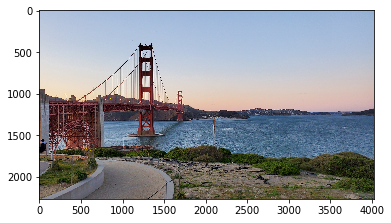

In [54]:
plt.imshow(img)

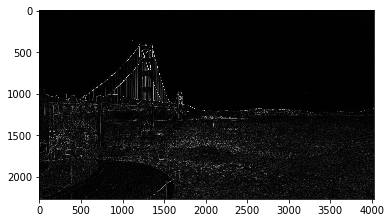

In [55]:
plt.imshow(edges_img)

In [65]:
import matplotlib

matplotlib.image.imsave('name.png', edges_img)